### CHSH GAME on Cirq

In [140]:
from matplotlib import pyplot as plt
import numpy
import cirq

In [141]:
# The mothed below generates the quantum circuit for Alice&Bob that depend on Charlie x and y.

def alice_bob_circuit(x, y):
    print(f'Charlie sends to Alice:{x}, Bob:{y}')
    
    circuit = cirq.Circuit()
    alice_qubit, bob_qubit = cirq.LineQubit.range(2)
    circuit.append(cirq.H(alice_qubit))
    circuit.append(cirq.CNOT(alice_qubit, bob_qubit))
    
    if x == 0 and y == 0:
        a, b = 0.0, -numpy.pi/4
    elif x == 0 and y == 1:
        a, b = 0.0, numpy.pi/4
    elif x == 1 and y == 0:
        a, b = -numpy.pi/2, -numpy.pi/4
    else:
        a, b = -numpy.pi/2, numpy.pi/4

    circuit.append(cirq.Ry(rads=a)(alice_qubit))
    circuit.append(cirq.Ry(rads=b)(bob_qubit))
    circuit.append(cirq.measure(alice_qubit, bob_qubit))
    print(f'{circuit}\n')
    return circuit

In [142]:
circuits = []
circuit_00 = alice_bob_circuit(0, 0)
circuit_01 = alice_bob_circuit(0, 1)
circuit_10 = alice_bob_circuit(1, 0)
circuit_11 = alice_bob_circuit(1, 1)
circuits.append(circuit_00)
circuits.append(circuit_10)
circuits.append(circuit_01)
circuits.append(circuit_11)

Charlie sends to Alice:0, Bob:0
0: ───H───@───Ry(0)────────M───
          │                │
1: ───────X───Ry(-0.25π)───M───

Charlie sends to Alice:0, Bob:1
0: ───H───@───Ry(0)───────M───
          │               │
1: ───────X───Ry(0.25π)───M───

Charlie sends to Alice:1, Bob:0
0: ───H───@───Ry(-0.5π)────M───
          │                │
1: ───────X───Ry(-0.25π)───M───

Charlie sends to Alice:1, Bob:1
0: ───H───@───Ry(-0.5π)───M───
          │               │
1: ───────X───Ry(0.25π)───M───



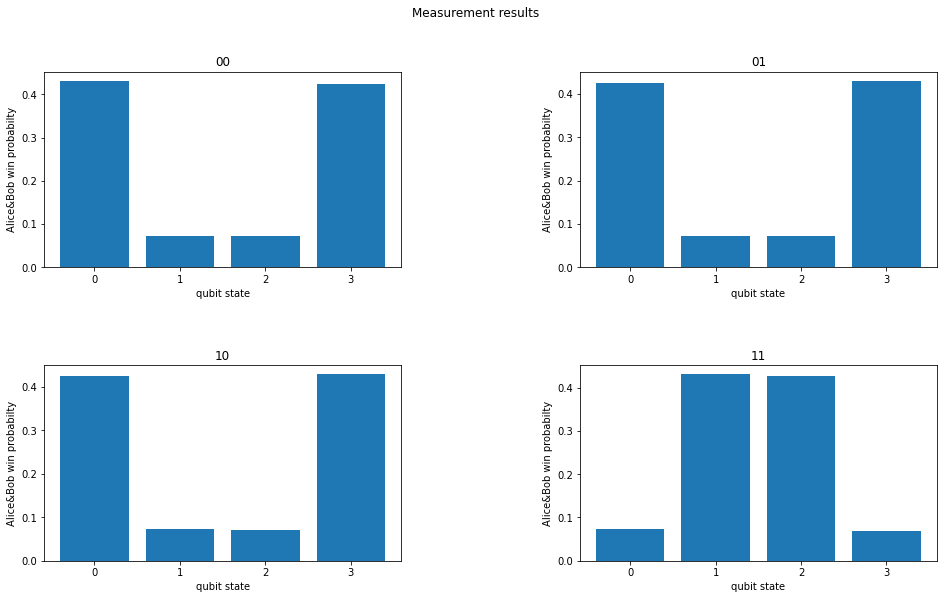

S Critic value: 2.843


In [145]:
rep=20000

fig, axs = plt.subplots(2, 2)
fig.suptitle('Measurement results')
fig.set_size_inches(16, 9)
total = 0.0

for i in range(circuits.__len__()):
    res = cirq.Simulator().run(circuits[i], repetitions=rep)
    data = cirq.get_state_histogram(res)
    norm_data = data / rep
    _ = cirq.plot_state_histogram(norm_data, axs[int(i / 2)][i % 2], ylabel='Alice&Bob win probabilty')
    
    axs[int(i / 2)][i % 2].set_title(f'{i:02b}')
    
    ab_is_zero_probabity = (data[0]+data[3])/rep
    ab_is_one_probabity = (data[1]+data[2])/rep
    
    total += abs(ab_is_zero_probabity-ab_is_one_probabity)
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

print(f'S Critic value: {total}')